# Neural Networks for Data Science Applications

## Lab session 1: TensorFlow 2.0 basics & Automatic differentiation

**Contents of the lab session**:
* Linear algebra in TensorFlow.
* Automatic gradient computation with tf.GradientTape.
* Simple example of gradient descent.

In [0]:
# Install the latest version of TF
# The '!' sign means a command that is executed externally
!pip install tensorflow==2.0.0

### 1 - Linear algebra

In [0]:
import tensorflow as tf

In [0]:
# Check the version
tf.__version__

'2.0.0'

In [0]:
# Check whether a GPU is available
# Hint: try to enable one from Runtime >> Change Runtime Type in Colab, and installling tensorflow-gpu.
tf.test.is_gpu_available()

False

In [0]:
# Simple matrix in NumPy
import numpy as np
A = np.random.rand(3, 2)

In [0]:
A

array([[0.92726273, 0.75240366],
       [0.20714281, 0.57399542],
       [0.00110189, 0.2898527 ]])

In [0]:
# Similar sintax in TF
tf.random.normal((3, 2))

<tf.Tensor: id=5, shape=(3, 2), dtype=float32, numpy=
array([[ 1.0847126 ,  0.89749205],
       [-0.58113194, -0.12092333],
       [-0.1850024 ,  0.24272662]], dtype=float32)>

In [0]:
# Default type is tf.float32, but you can force a different one
B = tf.ones((5, 4), dtype=tf.float64)

In [0]:
# Casting in TF
tf.cast(B, tf.int32)

<tf.Tensor: id=9, shape=(5, 4), dtype=int32, numpy=
array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)>

In [0]:
# NumPy --> TensorFlow
tf.constant(A)

<tf.Tensor: id=10, shape=(3, 2), dtype=float64, numpy=
array([[0.92726273, 0.75240366],
       [0.20714281, 0.57399542],
       [0.00110189, 0.2898527 ]])>

In [0]:
# TensorFlow --> NumPy
B.numpy()

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [0]:
B.shape

TensorShape([5, 4])

In [0]:
# Simple indexing
print(B[0])
print(B[0, 3])
print(B[0:2])
print(B[-1])

In [0]:
# Getting summaries from an array (NumPy version)
A.sum(axis=0)

array([1.13550743, 1.61625178])

In [0]:
# Getting summaries from an array (TensorFlow version)
tf.reduce_sum(B, axis=1)

<tf.Tensor: id=28, shape=(5,), dtype=float64, numpy=array([4., 4., 4., 4., 4.])>

In [0]:
# All operators are element-wise
B * B

<tf.Tensor: id=29, shape=(5, 4), dtype=float64, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])>

In [0]:
# Reshaping in NumPy
A.reshape(6, 1)

array([[0.92726273],
       [0.75240366],
       [0.20714281],
       [0.57399542],
       [0.00110189],
       [0.2898527 ]])

In [0]:
# Reshaping in TensorFlow
tf.reshape(B, (4, 5))

<tf.Tensor: id=31, shape=(4, 5), dtype=float64, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])>

In [0]:
# Broadcasting (once)
A = tf.random.uniform((3,))
B = tf.random.uniform((1, 3))
A + B

In [0]:
# Broadcasting (twice)
A = tf.random.uniform((4, 3, 1))
B = tf.random.uniform((1, 3, 5))
A + B

### 2 - Automatic differentiation

In [0]:
# Define a simple function
def fcn(x):
  return 2.0 * tf.cos(x)

In [0]:
# Plot the function (note: automatic NumPy -> TensorFlow conversion)
x_range = np.linspace(0, 5, 100)
y_range = fcn(x_range)

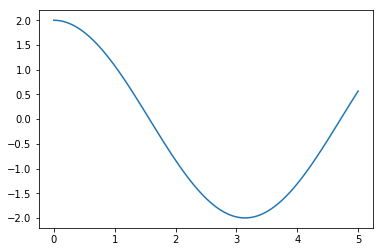

In [0]:
import matplotlib.pyplot as plt
plt.plot(x_range, y_range)

In [0]:
# Run the operations inside a tf.GradientTape
x = tf.constant(1.0)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = fcn(x)

In [0]:
# Get the gradient
g = tape.gradient(y, x)

In [0]:
# Check it is correct to numerical precision
g == -2.0*tf.sin(x)

<tf.Tensor: id=106, shape=(), dtype=float32, numpy=-1.6829419>

In [0]:
# Same, with tf.Variable (does not need to be watched)
x = tf.random.uniform((3, 2))
x = tf.Variable(x)

In [0]:
with tf.GradientTape() as tape:
  y = fcn(x)
  z = tf.reduce_sum(y) # Note: we need a scalar in output

In [0]:
tape.gradient(z, [x])

[<tf.Tensor: id=141, shape=(3, 2), dtype=float32, numpy=
 array([[-0.21220458, -0.819939  ],
        [-1.504415  , -0.1483928 ],
        [-1.0899347 , -1.2876378 ]], dtype=float32)>]

### 3 - Gradient Descent

In [0]:
x = tf.Variable(tf.ones(1))
x_history = [] # Evolution of x
y_history = [] # Evolution of the function
g_history = [] # Evolution of the gradient
for i in range(50):
  with tf.GradientTape() as tape:
      y = fcn(x)
      x_history.append(x.numpy())
      y_history.append(y.numpy())
  g = tape.gradient(y, x)
  g_history.append(g.numpy())
  x.assign_sub(0.05*g) # We cannot reassign a Variable with standard operators, otherwise it becomes a tensor

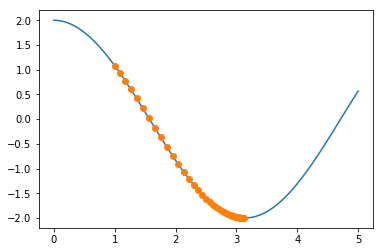

In [0]:
plt.plot(x_range, y_range)
plt.plot(x_history, fcn(x_history), 'o')

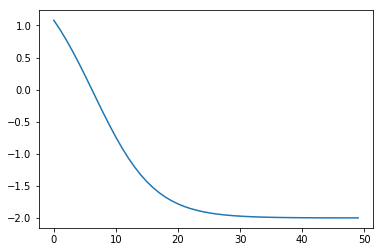

In [0]:
plt.plot(y_history)
plt.xlabel('Iteration')
plt.ylabel('Value of function')

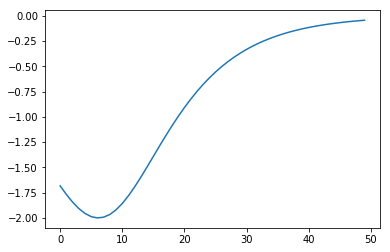

In [0]:
plt.plot(g_history)
plt.xlabel('Iteration')
plt.ylabel('Value of gradient')

### 4 - Advanced use cases

In [0]:
# Two variables!
v1 = tf.Variable(2.0)
v2 = tf.Variable(tf.ones(4))

In [0]:
# You can use conditional control flow (and other stuff) inside the GradientTape
use_sqrt = True
with tf.GradientTape() as tape:
  if use_sqrt:
    y = v1 + tf.reduce_sum(tf.sqrt(v2))
  else:
    y = v1 + tf.reduce_sum(v2)

In [0]:
tape.gradient(y, [v1, v2])

[<tf.Tensor: id=8749, shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: id=8753, shape=(4,), dtype=float32, numpy=array([0.5, 0.5, 0.5, 0.5], dtype=float32)>]

In [0]:
# Second-order derivatives
# Learn more: https://www.tensorflow.org/tutorials/customization/autodiff#higher-order_gradients
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
      y = tf.reduce_sum(tf.sqrt(v2))
  grad = tape.gradient(y, v2)
gradgrad = outer_tape.gradient(grad, v2)

In [0]:
gradgrad

<tf.Tensor: id=8798, shape=(4,), dtype=float32, numpy=array([-0.25, -0.25, -0.25, -0.25], dtype=float32)>

### Some reading material
* https://www.tensorflow.org/tutorials/customization/basics
* https://www.tensorflow.org/tutorials/customization/autodiff